In [1]:
from pathlib import Path
home = str(Path.home())
import sys
sys.path.append('{}/prog/msm/lib'.format(home))

In [2]:
import numpy as np
from simlib import *
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.set_cmap('rainbow')

<Figure size 432x288 with 0 Axes>

In [51]:
gaussians = []
m = 4.23454
gaussians.append(gaussian(A = np.ones(1),
                          M = np.array([-m]),
                          S = np.ones(1)))
gaussians.append(gaussian(A = np.ones(1),
                          M = np.array([m]),
                          S = np.ones(1)))

In [52]:
U = potential(gaussians)

In [53]:
xs = np.arange(-10, 10, 0.01)
ys = np.array([U.get_value([x]) for x in xs])

In [74]:
def is_transition(U, m, sign, x):
    cond_energy1 = U.get_value([x]) <= U.get_value([0]) - 4
    if sign < 0:
        cond_sign = x >= 0
        cond_energy2 = x >= m
    else:
        cond_sign = x <= 0
        cond_energy2 = x <= -m
    return (cond_sign and cond_energy1) or cond_energy2

In [75]:
cond_minus = np.zeros(xs.shape[0])
cond_plus = np.zeros(xs.shape[0])
for i, x in enumerate(xs):
    if is_transition(U, m, -1, x):
        cond_minus[i] = U.get_value([x])
        cond_plus[i] = np.nan
    elif is_transition(U, m, 1, x):
        cond_minus[i] = np.nan
        cond_plus[i] = U.get_value([x])
    else:
        cond_minus[i] = np.nan
        cond_plus[i] = np.nan

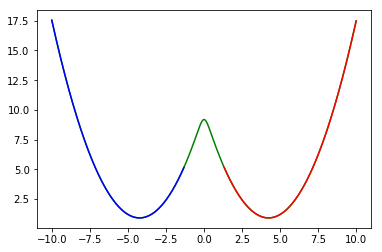

In [76]:
plt.plot(xs, ys, 'green')
plt.plot(xs, cond_minus, 'red')
plt.plot(xs, cond_plus, 'blue')